# K-Means Clustering Implementation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

%matplotlib inline

## 1. Loading the dataset

In [20]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [21]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

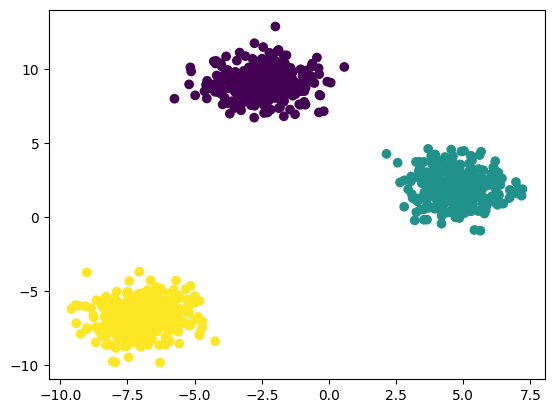

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## 2. Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3. Applying K-Means

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Elbow Method to select K value
wcss = list()
ks = [i for i in range(1, 11)]

for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

wcss

[1340.0,
 424.77950428412726,
 43.537817283488884,
 37.72954294342007,
 31.712185842165653,
 25.846187948776,
 26.866817281904435,
 21.62952613755298,
 19.978500230444542,
 17.24655446778022]

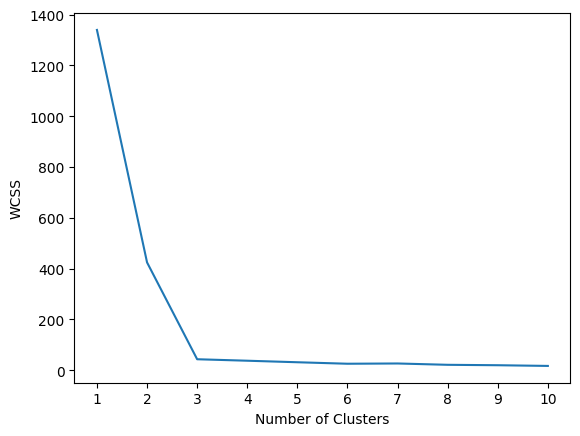

In [26]:
# Plotting Elbow Curve
plt.plot(ks, wcss)
plt.xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1,

In [28]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2,
       1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2,
       0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0,

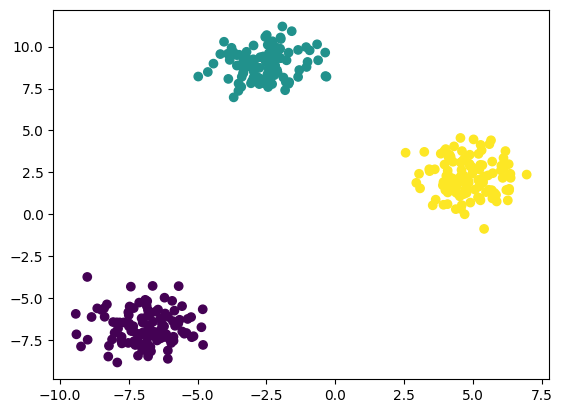

In [29]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

## 3. Finding the "Elbow"

In [30]:
kl = KneeLocator(ks, wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [31]:
silhouette_coefs = list()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefs.append(score)

In [32]:
silhouette_coefs

[0.5024632966384367,
 0.842476016737992,
 0.6771981529746964,
 0.6568555711830697,
 0.3541097629241706,
 0.35245211062368836,
 0.33975193343430315,
 0.31913130931173866,
 0.333759984719705]

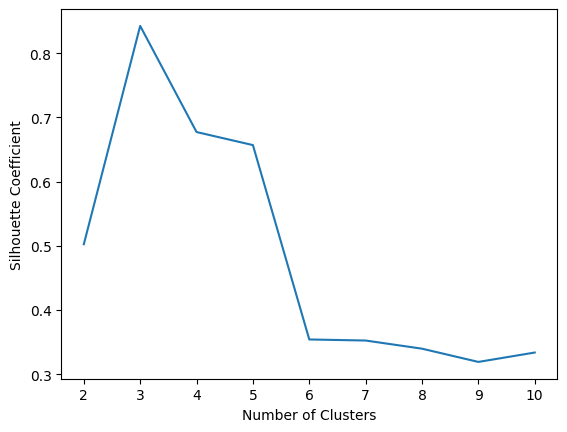

In [33]:
## Plotting Silhouette Score
plt.plot(range(2, 11), silhouette_coefs)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()